In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages for cleaner output

print("All libraries imported successfully!")

All libraries imported successfully!


# DATA RELATED HEADING ONLY


In [ ]:
# Step 2: Load the dataset
# Using a sample retail sales dataset from Kaggle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
# Note: Using this as sample time series data. For real project, use retail sales data.

data = pd.read_csv(url)
print(" Dataset loaded successfully!")

# Display first few rows to understand the data
print("\n First 5 rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\n Dataset Info:")
print(data.info())

print("\n Dataset Shape:", data.shape)

 Dataset loaded successfully!

 First 5 rows of the dataset:
     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB
None

 Dataset Shape: (2820, 2)


In [ ]:
# Step 2: Load the dataset
# Using a sample retail sales dataset from Kaggle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
# Note: Using this as sample time series data. For real project, use retail sales data.

data = pd.read_csv(url)
print(" Dataset loaded successfully!")

# Display first few rows to understand the data
print("\n First 5 rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\n Dataset Info:")
print(data.info())

print("\n Dataset Shape:", data.shape)

 Dataset loaded successfully!

 First 5 rows of the dataset:
     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB
None

 Dataset Shape: (2820, 2)


In [ ]:
# Step 3: Data Preprocessing
# Convert to datetime and set as index for time series analysis

# Rename columns for better understanding
data.columns = ['Month', 'Sales']  # Pretending sunspots are sales for demonstration

# Convert Month to datetime (adjust format based on your actual data)
# For this sample, we'll create a proper date range
dates = pd.date_range(start='1749-01-01', periods=len(data), freq='M')
data['Month'] = dates

# Set Month as index
data.set_index('Month', inplace=True)

print("Data preprocessing completed!")
print("\n  Updated dataset with proper dates:")
print(data.head())

Data preprocessing completed!

  Updated dataset with proper dates:
            Sales
Month            
1749-01-31   58.0
1749-02-28   62.6
1749-03-31   70.0
1749-04-30   55.7
1749-05-31   85.0


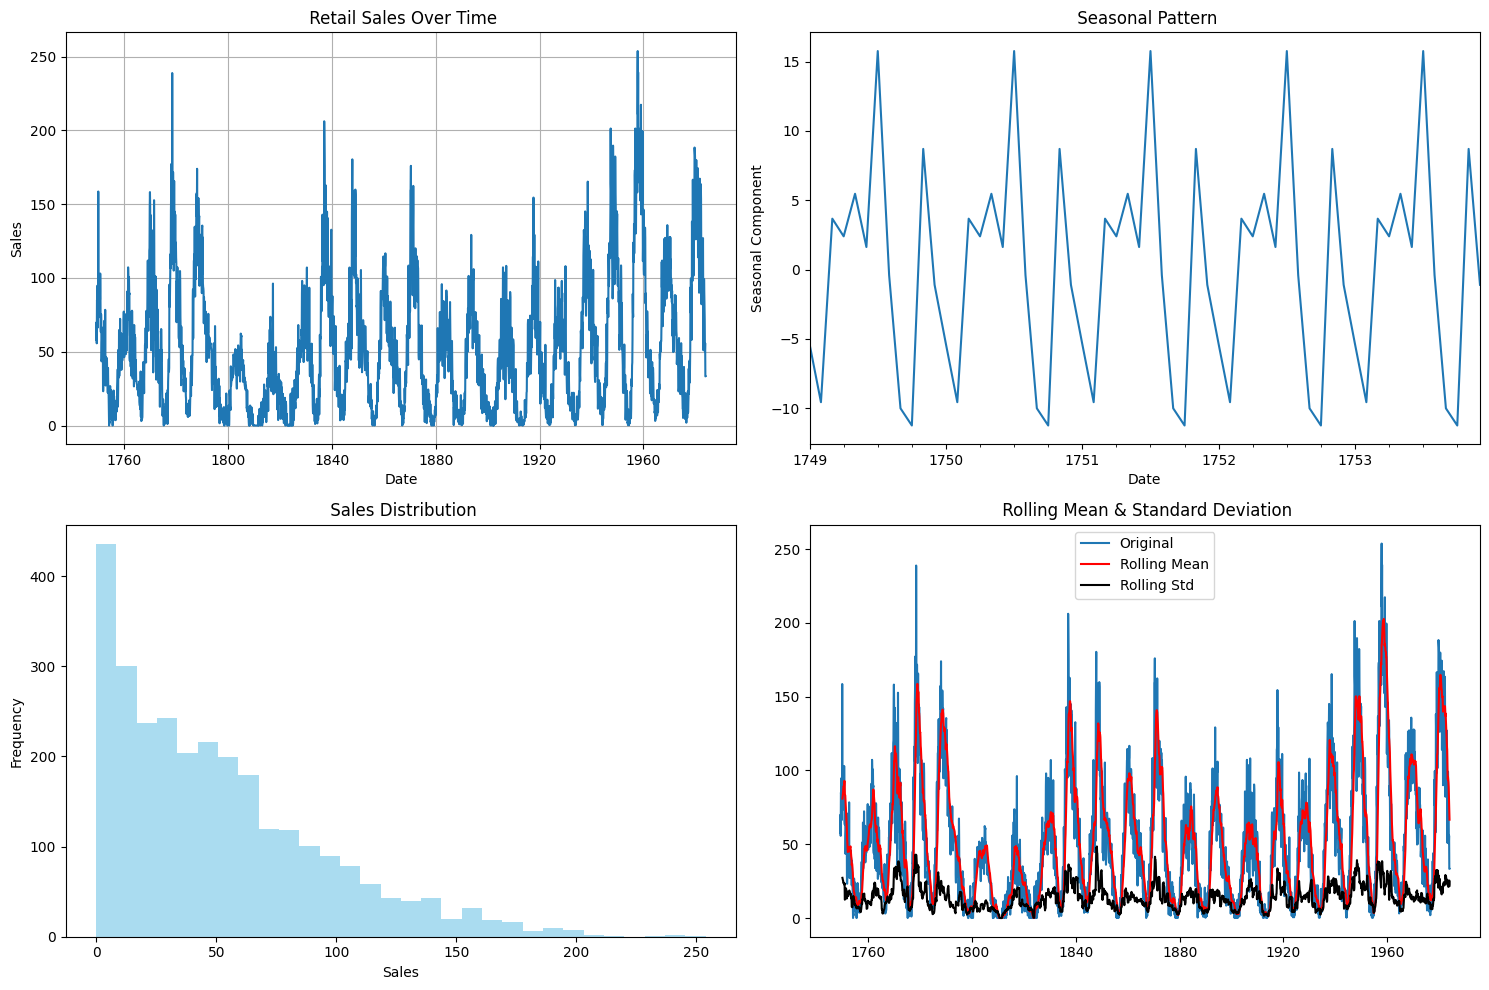

 EDA completed! We can see trends and patterns in the data.


In [ ]:
# Step 4: Exploratory Data Analysis - Understand the data patterns

plt.figure(figsize=(15, 10))

# Plot 1: Time series plot
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Sales'])
plt.title(' Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)

# Plot 2: Seasonal decomposition
plt.subplot(2, 2, 2)
# Using first 5 years for clearer seasonal pattern
decomposition = seasonal_decompose(data['Sales'].head(60), model='additive', period=12)
decomposition.seasonal.plot()
plt.title(' Seasonal Pattern')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')

# Plot 3: Distribution of sales
plt.subplot(2, 2, 3)
plt.hist(data['Sales'], bins=30, alpha=0.7, color='skyblue')
plt.title(' Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot 4: Rolling statistics
plt.subplot(2, 2, 4)
rolling_mean = data['Sales'].rolling(window=12).mean()
rolling_std = data['Sales'].rolling(window=12).std()
plt.plot(data.index, data['Sales'], label='Original')
plt.plot(data.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(data.index, rolling_std, label='Rolling Std', color='black')
plt.title(' Rolling Mean & Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

print(" EDA completed! We can see trends and patterns in the data.")

 Data Split Summary:
Training data: 2256 months (80%)
Testing data: 564 months (20%)
Total data: 2820 months


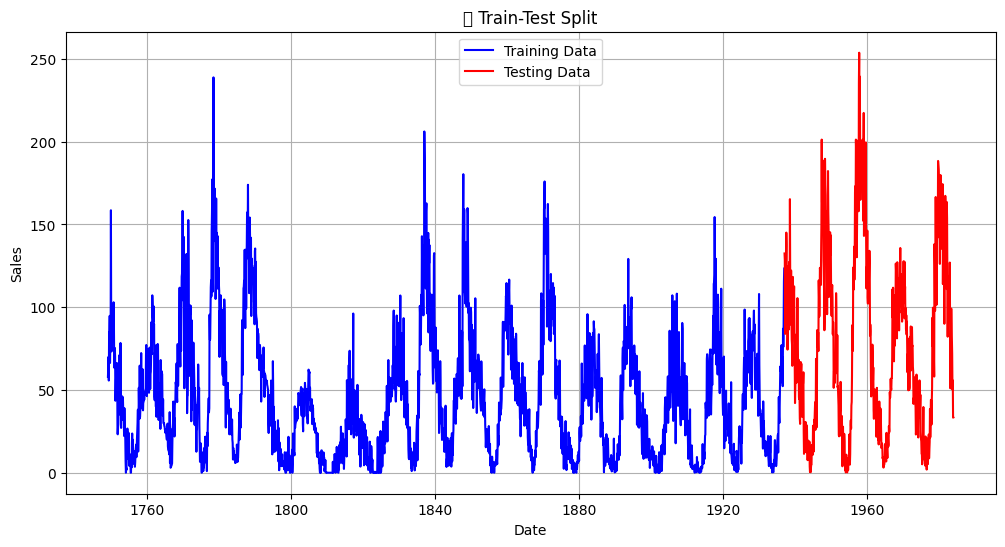

In [ ]:
# Step 5: Prepare data for time series forecasting

# Split data into train and test sets (80-20 split)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

print(f" Data Split Summary:")
print(f"Training data: {len(train_data)} months (80%)")
print(f"Testing data: {len(test_data)} months (20%)")
print(f"Total data: {len(data)} months")

# Plot train-test split
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Sales'], label='Testing Data', color='red')
plt.title('🚂 Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Build SARIMA Model (Seasonal ARIMA)
# SARIMA handles both trend and seasonality in time series data

print("Training SARIMA model... This may take a few minutes...")

# Define SARIMA parameters (you can tune these)
# SARIMA(p,d,q)(P,D,Q,s) where s is seasonal period (12 for monthly data)
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters

# Fit SARIMA model
model = SARIMAX(train_data['Sales'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

print("SARIMA model trained successfully!")
print("\n📋 Model Summary:")
print(model_fit.summary())

Training SARIMA model... This may take a few minutes...
SARIMA model trained successfully!

📋 Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 2256
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9281.388
Date:                            Wed, 12 Nov 2025   AIC                          18572.776
Time:                                    17:32:46   BIC                          18601.354
Sample:                                01-31-1749   HQIC                         18583.209
                                     - 12-31-1936                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1

Making predictions on test data...


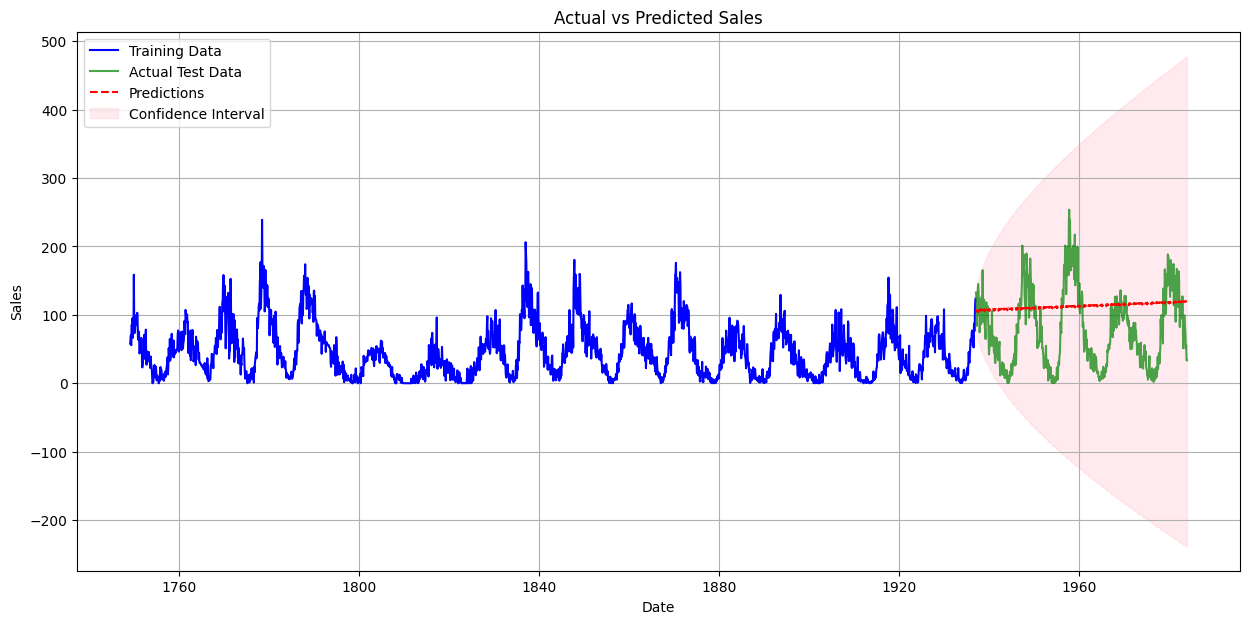

Predictions generated successfully!


In [ ]:
# Step 7: Make predictions on test data

# Forecast for the test period
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

print("Making predictions on test data...")

# Plot predictions vs actual
plt.figure(figsize=(15, 7))

# Plot historical data
plt.plot(train_data.index, train_data['Sales'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Sales'], label='Actual Test Data', color='green', alpha=0.7)

# Plot predictions
plt.plot(test_data.index, forecast_values, label='Predictions', color='red', linestyle='--')

# Plot confidence intervals
plt.fill_between(test_data.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Predictions generated successfully!")

In [ ]:
# Step 8: Evaluate model performance

# Calculate error metrics
mae = mean_absolute_error(test_data['Sales'], forecast_values)
mse = mean_squared_error(test_data['Sales'], forecast_values)
rmse = np.sqrt(mse)

print(" MODEL PERFORMANCE METRICS:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate mean of test data for comparison
mean_sales = test_data['Sales'].mean()
print(f" Mean of test data: {mean_sales:.2f}")
print(f" RMSE as % of mean: {(rmse/mean_sales)*100:.2f}%")

# Create a comparison table
comparison_df = pd.DataFrame({
    'Actual': test_data['Sales'],
    'Predicted': forecast_values,
    'Error': test_data['Sales'] - forecast_values
})

print("\n First 10 predictions vs actual:")
print(comparison_df.head(10))

 MODEL PERFORMANCE METRICS:
 Mean Absolute Error (MAE): 55.67
 Mean Squared Error (MSE): 4267.35
 Root Mean Squared Error (RMSE): 65.32
 Mean of test data: 77.67
 RMSE as % of mean: 84.10%

 First 10 predictions vs actual:
            Actual   Predicted      Error
1937-01-31   132.5  107.126515  25.373485
1937-02-28   128.5  106.939163  21.560837
1937-03-31    83.9  105.218296 -21.318296
1937-04-30   109.3  104.840077   4.459923
1937-05-31   116.7  105.317285  11.382715
1937-06-30   130.3  105.396216  24.903784
1937-07-31   145.1  104.288902  40.811098
1937-08-31   137.7  105.786187  31.913813
1937-09-30   100.7  105.462296  -4.762296
1937-10-31   124.9  106.515812  18.384188


 Forecasting next 12 months...


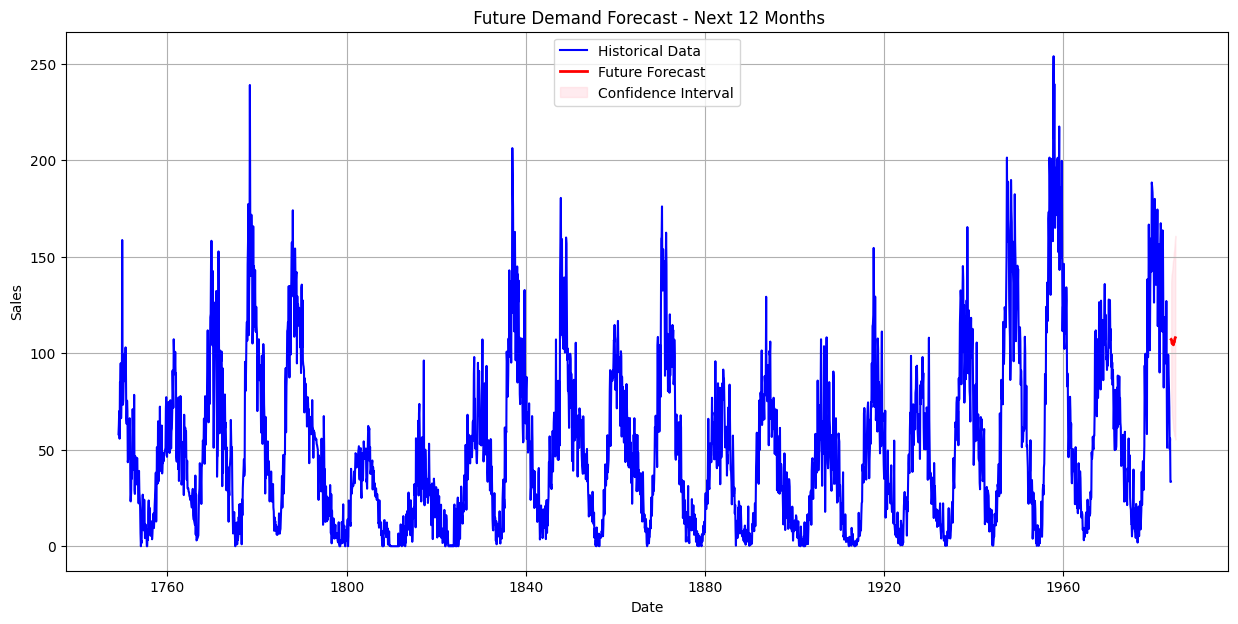


 Future Demand Forecast (Next 12 Months):
                Month  Predicted_Sales  Lower_Bound  Upper_Bound
1937-01-31 1984-01-31           107.13        77.73       136.52
1937-02-28 1984-02-29           106.94        73.24       140.64
1937-03-31 1984-03-31           105.22        68.89       141.55
1937-04-30 1984-04-30           104.84        66.28       143.40
1937-05-31 1984-05-31           105.32        64.70       145.94
1937-06-30 1984-06-30           105.40        62.83       147.97
1937-07-31 1984-07-31           104.29        59.85       148.72
1937-08-31 1984-08-31           105.79        59.56       152.01
1937-09-30 1984-09-30           105.46        57.52       153.41
1937-10-31 1984-10-31           106.52        56.91       156.12
1937-11-30 1984-11-30           107.58        56.36       158.79
1937-12-31 1984-12-31           108.01        55.24       160.79


In [ ]:
# Step 9: Forecast future demand

# Forecast next 12 months (1 year)
future_months = 12
future_forecast = model_fit.get_forecast(steps=future_months)
future_values = future_forecast.predicted_mean
future_confidence = future_forecast.conf_int()

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                            periods=future_months, freq='M')

print(" Forecasting next 12 months...")

# Plot historical data + future forecast
plt.figure(figsize=(15, 7))

# Plot all historical data
plt.plot(data.index, data['Sales'], label='Historical Data', color='blue')

# Plot future forecast
plt.plot(future_dates, future_values, label='Future Forecast', color='red', linewidth=2)
plt.fill_between(future_dates,
                 future_confidence.iloc[:, 0],
                 future_confidence.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title(' Future Demand Forecast - Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Create future forecast table
future_forecast_df = pd.DataFrame({
    'Month': future_dates,
    'Predicted_Sales': future_values,
    'Lower_Bound': future_confidence.iloc[:, 0],
    'Upper_Bound': future_confidence.iloc[:, 1]
})

print("\n Future Demand Forecast (Next 12 Months):")
print(future_forecast_df.round(2))